In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

%matplotlib inline

In [2]:
#data
# It contains fast-food frequency and meal options that people are most likely to buy. 
# It also contains what aspects of a fast-food brand makes it more appealing.
# The data was acquired by sending out questionnaires over a two day period in September 2018. 
# It was mostly geared at people who consider themselves "Foodies".

data = pd.read_csv('fast_food.csv')

In [3]:
data.head()

,Timestamp,What age group do you fall under?,Which is your gender?,What would you say accurately matches your personality in a group discussion?,Choose all the options that are close to where you reside.,How often do you eat from fast foods each month?,What does your purchase mostly consist of? [Nigerian dishes],What does your purchase mostly consist of? [Burger],What does your purchase mostly consist of? [Pizza],What does your purchase mostly consist of? [Small chops],...,"When it comes to ordering, which do you prefer the most?",What is the best way to reach you for special offers/Discounts?,What about a fast food restaurant endears you to them? [Their special offers],What about a fast food restaurant endears you to them? [The quality],What about a fast food restaurant endears you to them? [Value for your money],What about a fast food restaurant endears you to them? [Excellent service],What about a fast food restaurant endears you to them? [Convenience],What about a fast food restaurant endears you to them? [Price],What about a fast food restaurant endears you to them? [Social media savviness],What do you consider yourself to be the most?
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert
1,2018/09/07 4:32:02 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Lekki Phase 1,7 - 10,Highly Unlikely,Likely,Likely,Most likely,...,Order in a physical store and takeaway,Via SMS,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Indifferent,A Jollof Warrior
2,2018/09/07 5:12:57 PM GMT+1,25 - 34,Male,"Passionate, I sometimes over talk.",Victoria Island;Ikoyi;Lekki Phase 1;Gbagada,4 - 6,Likely,Highly Unlikely,Most likely,Likely,...,Order online and pick up,Via SMS,Agree,Agree,Strongly Agree,Strongly Agree,Stongly Disagrre,Agree,Agree,A Jollof Warrior
3,2018/09/07 5:39:48 PM GMT+1,18 - 25,Female,"Passionate, I sometimes over talk.",Lekki Phase 1,4 - 6,Most likely,Likely,Most likely,Likely,...,Order online and get delivered;Order online an...,Via SMS,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Strongly Agree,Indifferent,A Pizza Connoisseur
4,2018/09/07 5:59:52 PM GMT+1,25 - 34,Female,"Passionate, I sometimes over talk.",Gbagada,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,...,Order online and get delivered;Order in a phys...,In-stores,Indifferent,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Small chops Supremacist


In [4]:
#get columns
data.columns

Index(['Timestamp', 'What age group do you fall under?',
       'Which is your gender?',
       'What would you say accurately matches your personality in a group discussion?',
       'Choose all the options that are close to where you reside.',
       'How often do you eat from fast foods each month?',
       'What does your purchase mostly consist of?  [Nigerian dishes]',
       'What does your purchase mostly consist of?  [Burger]',
       'What does your purchase mostly consist of?  [Pizza]',
       'What does your purchase mostly consist of?  [Small chops]',
       'What does your purchase mostly consist of?  [Shawarma]',
       'What do you look for when choosing a fast food restaurant?',
       'Which of the following have you been to at least twice in the last 2 months',
       'When it comes to ordering, which do you prefer the most?',
       'What is the best way to reach you for special offers/Discounts?',
       'What about a fast food restaurant endears you to them? [Their

In [5]:
#rename columns
new_columns = ['created_at', 'age_group', 'gender', 'personality', 'areas_close_to_residence', 'times_at_fast_food_per_month', 'nigerian_dishes_in_purchase',
              'burger_in_purchase', 'pizza_in_purchase', 'small_chops_in_purchase', 'shawarma_in_purchase', 'preference_choosing_restaurant',
              'visited_twice_last_2_months', 'preferred_means_of_ordering', 'best_way_to_reach_for_discounts', 'does_fast_food_special_offers_endears_to_you',
              'does_fast_food_quality_endears_to_you', 'does_fast_food_value_for_your_money_endears_to_you',
              'does_fast_food_service_endears_to_you', 'does_fast_food_convenience_endears_you', 'does_fast_food_price_endears_to_you',
              'does_fast_food_social_media_savviness_endears_to_you', 'your_class']

data.columns = new_columns

In [6]:
data.columns

Index(['created_at', 'age_group', 'gender', 'personality',
       'areas_close_to_residence', 'times_at_fast_food_per_month',
       'nigerian_dishes_in_purchase', 'burger_in_purchase',
       'pizza_in_purchase', 'small_chops_in_purchase', 'shawarma_in_purchase',
       'preference_choosing_restaurant', 'visited_twice_last_2_months',
       'preferred_means_of_ordering', 'best_way_to_reach_for_discounts',
       'does_fast_food_special_offers_endears_to_you',
       'does_fast_food_quality_endears_to_you',
       'does_fast_food_value_for_your_money_endears_to_you',
       'does_fast_food_service_endears_to_you',
       'does_fast_food_convenience_endears_you',
       'does_fast_food_price_endears_to_you',
       'does_fast_food_social_media_savviness_endears_to_you', 'your_class'],
      dtype='object')

In [7]:
data.shape

(441, 23)

In [8]:
data.head()

,created_at,age_group,gender,personality,areas_close_to_residence,times_at_fast_food_per_month,nigerian_dishes_in_purchase,burger_in_purchase,pizza_in_purchase,small_chops_in_purchase,...,preferred_means_of_ordering,best_way_to_reach_for_discounts,does_fast_food_special_offers_endears_to_you,does_fast_food_quality_endears_to_you,does_fast_food_value_for_your_money_endears_to_you,does_fast_food_service_endears_to_you,does_fast_food_convenience_endears_you,does_fast_food_price_endears_to_you,does_fast_food_social_media_savviness_endears_to_you,your_class
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert
1,2018/09/07 4:32:02 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Lekki Phase 1,7 - 10,Highly Unlikely,Likely,Likely,Most likely,...,Order in a physical store and takeaway,Via SMS,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Indifferent,A Jollof Warrior
2,2018/09/07 5:12:57 PM GMT+1,25 - 34,Male,"Passionate, I sometimes over talk.",Victoria Island;Ikoyi;Lekki Phase 1;Gbagada,4 - 6,Likely,Highly Unlikely,Most likely,Likely,...,Order online and pick up,Via SMS,Agree,Agree,Strongly Agree,Strongly Agree,Stongly Disagrre,Agree,Agree,A Jollof Warrior
3,2018/09/07 5:39:48 PM GMT+1,18 - 25,Female,"Passionate, I sometimes over talk.",Lekki Phase 1,4 - 6,Most likely,Likely,Most likely,Likely,...,Order online and get delivered;Order online an...,Via SMS,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Strongly Agree,Indifferent,A Pizza Connoisseur
4,2018/09/07 5:59:52 PM GMT+1,25 - 34,Female,"Passionate, I sometimes over talk.",Gbagada,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,...,Order online and get delivered;Order in a phys...,In-stores,Indifferent,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Small chops Supremacist


In [9]:
data.dtypes
#yuck

created_at                                              object
age_group                                               object
gender                                                  object
personality                                             object
areas_close_to_residence                                object
times_at_fast_food_per_month                            object
nigerian_dishes_in_purchase                             object
burger_in_purchase                                      object
pizza_in_purchase                                       object
small_chops_in_purchase                                 object
shawarma_in_purchase                                    object
preference_choosing_restaurant                          object
visited_twice_last_2_months                             object
preferred_means_of_ordering                             object
best_way_to_reach_for_discounts                         object
does_fast_food_special_offers_endears_to_you           

# Data Preprocessing

In [10]:
#check for missing values
data.isna().sum()

created_at                                               0
age_group                                                0
gender                                                   0
personality                                              1
areas_close_to_residence                                20
times_at_fast_food_per_month                             0
nigerian_dishes_in_purchase                              0
burger_in_purchase                                       0
pizza_in_purchase                                        0
small_chops_in_purchase                                  0
shawarma_in_purchase                                     0
preference_choosing_restaurant                           0
visited_twice_last_2_months                              0
preferred_means_of_ordering                              0
best_way_to_reach_for_discounts                          0
does_fast_food_special_offers_endears_to_you             0
does_fast_food_quality_endears_to_you                   

In [11]:
#lets look at the residence
data['areas_close_to_residence'].value_counts()

Gbagada                                               119
Magodo                                                 55
Lekki Phase 1                                          50
Victoria Island                                        41
Victoria Island;Ikoyi;Lekki Phase 1                    40
Magodo;Gbagada                                         38
Ikoyi                                                  14
Victoria Island;Lekki Phase 1                          11
Victoria Island;Ikoyi;Gbagada                           9
Victoria Island;Gbagada                                 7
Victoria Island;Magodo;Ikoyi;Lekki Phase 1;Gbagada      7
Victoria Island;Ikoyi;Lekki Phase 1;Gbagada             6
Victoria Island;Ikoyi                                   5
Lekki Phase 1;Gbagada                                   4
Ikoyi;Gbagada                                           4
Magodo;Lekki Phase 1;Gbagada                            2
Victoria Island;Magodo;Ikoyi;Lekki Phase 1              2
Ikoyi;Lekki Ph

In [12]:
#values probably missing becuase where  areas close to where reside were not available on the questionnaire
#lets replace with 'others'

data['areas_close_to_residence'] = data['areas_close_to_residence'].fillna('Others')
data.isna().sum()

created_at                                              0
age_group                                               0
gender                                                  0
personality                                             1
areas_close_to_residence                                0
times_at_fast_food_per_month                            0
nigerian_dishes_in_purchase                             0
burger_in_purchase                                      0
pizza_in_purchase                                       0
small_chops_in_purchase                                 0
shawarma_in_purchase                                    0
preference_choosing_restaurant                          0
visited_twice_last_2_months                             0
preferred_means_of_ordering                             0
best_way_to_reach_for_discounts                         0
does_fast_food_special_offers_endears_to_you            0
does_fast_food_quality_endears_to_you                   0
does_fast_food

In [13]:
#check personlity
data['personality'].value_counts()

I am original and a nonconformist ( My opinion is not influenced by the group)    210
Shy, but I hold my own.                                                           113
Passionate, I sometimes over talk.                                                108
I am authoritative.                                                                 9
Name: personality, dtype: int64

In [14]:
#replace with mode
data['personality'] = data['personality'].fillna(data['personality'].mode().iloc[0])

In [15]:
data.isna().sum()
#we good

created_at                                              0
age_group                                               0
gender                                                  0
personality                                             0
areas_close_to_residence                                0
times_at_fast_food_per_month                            0
nigerian_dishes_in_purchase                             0
burger_in_purchase                                      0
pizza_in_purchase                                       0
small_chops_in_purchase                                 0
shawarma_in_purchase                                    0
preference_choosing_restaurant                          0
visited_twice_last_2_months                             0
preferred_means_of_ordering                             0
best_way_to_reach_for_discounts                         0
does_fast_food_special_offers_endears_to_you            0
does_fast_food_quality_endears_to_you                   0
does_fast_food

In [16]:
#drop created_at
data.drop('created_at', axis=1, inplace=True)

In [17]:
data['age_group'].value_counts()

18 - 24    199
25 - 34    198
35 - 39     22
40+         13
18 - 25      7
16           1
21           1
Name: age_group, dtype: int64

In [18]:
#replace 18-25 with 18-24 and 21 with 18 - 25
data['age_group'] = data['age_group'].replace({'18 - 25':'18 - 24', '21':'18 - 24'})

In [19]:
data['age_group'].value_counts()

18 - 24    207
25 - 34    198
35 - 39     22
40+         13
16           1
Name: age_group, dtype: int64

In [20]:
#lets categorize the age groups
age_groups = {'16':'teenager', '18 - 24': 'growing_adults', '25 - 34':'young_adults', '35 - 39':'adults', '40+':'older adults'}
data['age_group'] = data['age_group'].replace(age_groups)

In [21]:
#personality..this affects life choices
data['personality'].value_counts()

I am original and a nonconformist ( My opinion is not influenced by the group)    211
Shy, but I hold my own.                                                           113
Passionate, I sometimes over talk.                                                108
I am authoritative.                                                                 9
Name: personality, dtype: int64

In [22]:
personality_groups = {'I am original and a nonconformist ( My opinion is not influenced by the group)':'class_a',
                     'Shy, but I hold my own.':'class_b', 'Passionate, I sometimes over talk.':'class_c', 'I am authoritative.':'class_d'}
data['personality'] = data['personality'].replace(personality_groups)

In [23]:
#areas close to residence... sh
data['areas_close_to_residence'].value_counts()
#we gonna segment this into mainland and island... you either living around the mainland or island. 
#You can't for example claim to be living arounf Victoria Island and Gbagada. These are 2 distinct places

Gbagada                                               119
Magodo                                                 55
Lekki Phase 1                                          50
Victoria Island                                        41
Victoria Island;Ikoyi;Lekki Phase 1                    40
Magodo;Gbagada                                         38
Others                                                 20
Ikoyi                                                  14
Victoria Island;Lekki Phase 1                          11
Victoria Island;Ikoyi;Gbagada                           9
Victoria Island;Magodo;Ikoyi;Lekki Phase 1;Gbagada      7
Victoria Island;Gbagada                                 7
Victoria Island;Ikoyi;Lekki Phase 1;Gbagada             6
Victoria Island;Ikoyi                                   5
Lekki Phase 1;Gbagada                                   4
Ikoyi;Gbagada                                           4
Victoria Island;Magodo;Ikoyi;Lekki Phase 1              2
Magodo;Lekki P

In [24]:
island_areas = ['Victoria Island', 'Lekki Phase 1', 'Ikoyi']
for i in data.index:
    if 'Victoria Island' in data.at[i, 'areas_close_to_residence'] or 'Lekki Phase 1' in data.at[i, 'areas_close_to_residence'] or 'Ikoyi' in data.at[i, 'areas_close_to_residence']:
        data.at[i, 'areas_close_to_residence'] = 'island'
        
#     if 'Victoria Island' not in data.at[i, 'areas_close_to_residence'] or 'Lekki Phase 1' not in data.at[i, 'areas_close_to_residence'] or 'Ikoyi' not in data.at[i, 'areas_close_to_residence']:
#         data.at[i, 'areas_close_to_residence'] = 'mainland'
#some refacoring needed

In [25]:
data['areas_close_to_residence'].value_counts()

island            209
Gbagada           119
Magodo             55
Magodo;Gbagada     38
Others             20
Name: areas_close_to_residence, dtype: int64

In [26]:
data['areas_close_to_residence'] = data['areas_close_to_residence'].replace({'Gbagada':'mainland', 
                                'Magodo':'mainland', 'Others': 'mainland', 'Magodo;Gbagada':'mainland'})
#not effective...temporarily fix

In [27]:
data['areas_close_to_residence'].value_counts()
#great

mainland    232
island      209
Name: areas_close_to_residence, dtype: int64

In [28]:
data['times_at_fast_food_per_month'].value_counts()
#lets leave like this

4 - 6           127
2 - 3           120
More than 10     83
7 - 10           66
0 - 1            45
Name: times_at_fast_food_per_month, dtype: int64

In [29]:
data['visited_twice_last_2_months'].value_counts()

Domino's Pizza                                                        197
Domino's Pizza;Debonair's Pizza                                        46
Domino's Pizza Saka                                                    43
Debonair's Pizza                                                       25
Domino's Pizza Saka;Debonair's Pizza                                    7
KFC                                                                     3
Chicken republic                                                        3
Domino's Pizza;Milano Pizza                                             2
Chicken Republic                                                        2
None                                                                    2
La Pizza                                                                2
Domino's Pizza;Chicken republic                                         2
The place                                                               2
Chicken Republic                      

Feature engineering

In [30]:
#create new columns outta the 'visited_twice_last_2_months' columns
data['visited_domino'] = 0
data['visited_debonair'] = 0
data['visited_chicken_republic'] = 0
data['visited_coldstone'] = 0
data['visited_kfc'] = 0
data['visited_others'] = 0

In [31]:
other_places = ['Milano Pizza', 'The place', 'La Pizza', 'Mr Biggs', 'Kilimanjaro', 'Shoprite', 'spur', 'Simply delicious', 'crunchies', 'Hubmart food court','sharwarma', 'Surulere mall',
'Big treat', 'Tantaliser', 'I mostly order online', 'Mega chicken', 'Sweat Sensation', 
'BUKKA HUT', 'The Olace ', 'Tasty fried chicken', 'Megachicken', 'Native Cousine', 'Pick n pay sharwama']

for i in data.index:
    if 'Domino' in data.at[i, 'visited_twice_last_2_months']:
        data.at[i, 'visited_domino'] = 1
    if 'bonair' in data.at[i, 'visited_twice_last_2_months']:
        data.at[i, 'visited_debonair'] = 1
    if 'epublic' in data.at[i, 'visited_twice_last_2_months']:
        data.at[i, 'visited_chicken_republic'] = 1
    if 'stone' in data.at[i, 'visited_twice_last_2_months']:
        data.at[i, 'visited_coldstone'] = 1
    if 'kfc' in data.at[i, 'visited_twice_last_2_months'] or 'KFC' in data.at[i, 'visited_twice_last_2_months'] or 'entucky' in data.at[i, 'visited_twice_last_2_months']:
        data.at[i, 'visited_kfc'] = 1
    if data.at[i, 'visited_twice_last_2_months'] in other_places:
        data.at[i, 'visited_others'] = 1
        

In [32]:
data.drop('visited_twice_last_2_months', axis=1, inplace=True)

In [33]:
data['preference_choosing_restaurant'].value_counts()

Value for your money                                                           107
Vast menu options;Quality;Value for your money                                  52
Quality                                                                         44
Quality;Value for your money                                                    26
Closest place;Quality;Value for your money                                      25
Closest place;Vast menu options;Quality;Value for your money                    21
Closest place;Cheapest place;Vast menu options;Quality;Value for your money     21
Closest place;Cheapest place;Quality;Value for your money                       19
Vast menu options                                                               17
Closest place                                                                   14
Cheapest place                                                                  11
Vast menu options;Value for your money                                          10
Clos

In [34]:
#create new columns for 'preference_choosing_restaurant'
data['prefer_value_for_money'] = 0
data['prefer_vast_menu_options'] = 0
data['prefer_quality'] = 0
data['prefer_closest_place'] = 0
data['prefer_cheapest_place'] = 0


In [35]:
for i in data.index:
    if 'Value for your money' in data.at[i, 'preference_choosing_restaurant']:
        data.at[i, 'prefer_value_for_money'] = 1
        
    if 'Vast menu options' in data.at[i, 'preference_choosing_restaurant']:
        data.at[i, 'prefer_vast_menu_options'] = 1
        
    if 'Quality' in data.at[i, 'preference_choosing_restaurant']:
        data.at[i, 'prefer_quality'] = 1
        
    if 'Closest place' in data.at[i, 'preference_choosing_restaurant']:
        data.at[i, 'prefer_closest_place'] = 1
        
    if 'Cheapest place' in data.at[i, 'preference_choosing_restaurant']:
        data.at[i, 'prefer_cheapest_place'] = 1
    

In [36]:
data.drop('preference_choosing_restaurant', axis=1, inplace=True)

In [37]:
data.columns

Index(['age_group', 'gender', 'personality', 'areas_close_to_residence',
       'times_at_fast_food_per_month', 'nigerian_dishes_in_purchase',
       'burger_in_purchase', 'pizza_in_purchase', 'small_chops_in_purchase',
       'shawarma_in_purchase', 'preferred_means_of_ordering',
       'best_way_to_reach_for_discounts',
       'does_fast_food_special_offers_endears_to_you',
       'does_fast_food_quality_endears_to_you',
       'does_fast_food_value_for_your_money_endears_to_you',
       'does_fast_food_service_endears_to_you',
       'does_fast_food_convenience_endears_you',
       'does_fast_food_price_endears_to_you',
       'does_fast_food_social_media_savviness_endears_to_you', 'your_class',
       'visited_domino', 'visited_debonair', 'visited_chicken_republic',
       'visited_coldstone', 'visited_kfc', 'visited_others',
       'prefer_value_for_money', 'prefer_vast_menu_options', 'prefer_quality',
       'prefer_closest_place', 'prefer_cheapest_place'],
      dtype='object')

In [38]:
data['preferred_means_of_ordering'].value_counts()

Order in a physical store and takeaway                                                                                                  136
Order in a physical store and dine in                                                                                                    89
Order online and get delivered                                                                                                           75
Order in a physical store and dine in;Order in a physical store and takeaway                                                             49
Order online and get delivered;Order in a physical store and takeaway                                                                    37
Order online and get delivered;Order in a physical store and dine in                                                                     13
Order online and get delivered;Order in a physical store and dine in;Order in a physical store and takeaway                              12
Order online and pic

In [39]:
#create additional columns for 'preferred_means_of_ordering' 
data['prefer_ordering_in_store'] = 0
data['prefer_ordering_takeaway'] = 0
data['prefer_ordering_online'] = 0

In [40]:
for i in data.index:
    if 'Order in a physical stor' in data.at[i, 'preferred_means_of_ordering']:
        data.at[i, 'prefer_ordering_in_store'] = 1
        
    if 'takeaway' in data.at[i, 'preferred_means_of_ordering']:
        data.at[i, 'prefer_ordering_takeaway'] = 1
        
    if 'Order online' in data.at[i, 'preferred_means_of_ordering']:
        data.at[i, 'prefer_ordering_online'] = 1

In [41]:
data.drop('preferred_means_of_ordering', axis=1, inplace=True)

In [42]:
data.columns

Index(['age_group', 'gender', 'personality', 'areas_close_to_residence',
       'times_at_fast_food_per_month', 'nigerian_dishes_in_purchase',
       'burger_in_purchase', 'pizza_in_purchase', 'small_chops_in_purchase',
       'shawarma_in_purchase', 'best_way_to_reach_for_discounts',
       'does_fast_food_special_offers_endears_to_you',
       'does_fast_food_quality_endears_to_you',
       'does_fast_food_value_for_your_money_endears_to_you',
       'does_fast_food_service_endears_to_you',
       'does_fast_food_convenience_endears_you',
       'does_fast_food_price_endears_to_you',
       'does_fast_food_social_media_savviness_endears_to_you', 'your_class',
       'visited_domino', 'visited_debonair', 'visited_chicken_republic',
       'visited_coldstone', 'visited_kfc', 'visited_others',
       'prefer_value_for_money', 'prefer_vast_menu_options', 'prefer_quality',
       'prefer_closest_place', 'prefer_cheapest_place',
       'prefer_ordering_in_store', 'prefer_ordering_takeaway'

In [43]:
data['best_way_to_reach_for_discounts'].value_counts()

Via SMS                               213
Via Emails                            135
In-stores                              50
An app belonging to the restaurant     36
Online ads                              1
Social media                            1
Social Media                            1
Instagram                               1
Through social media                    1
Social media                            1
Social media platforms                  1
Name: best_way_to_reach_for_discounts, dtype: int64

In [44]:
data['best_way_to_reach_for_discounts'] = data['best_way_to_reach_for_discounts'].replace({'Via SMS': 'sms',
                                        'Via Emails':'email', 'In-stores':'in_store', 'An app belonging to the restaurant':'restaurant_app',
                                        'Online ads ':'social_media', 'Social media ':'social_media', 'Instagram':'social_media',
                                        'Through social media ':'social_media', 'Social media platforms':'social_media', 'Social Media':'social_media'})

In [45]:
#work on the 'your_class_column'
replace = {'A Jollof Warrior':'jollof_lover', 'A Shawarma Expert':'shawarma_lover', 'A Pizza Connoisseur':
          'pizza_lover', 'Small Chops Supremacist':'small_chops_lover', 'A Burger Elitist':'burger_lover',
          'A Turkey Supremacist':'turkey_lover', 'Amala and Abula loyal fan':'swallow_lover', 'A swallow Dragon':'swallow_lover',
          'A Main Dish Authority.':'jollof_lover', 'Pizza, small chops and shawarma warrior':'pizza_small_chops_shawarma_lover',
          'chicken and salad':'chicken_salad_lover', 'Fried rice expert':'fried_rice_lover', 'Small chops Supremacist':'small_chops_lover',
          'Meat/Chicken pie bender':'meat_chicken_pie_lover', 'A delicious foodie':'foodie', 'Fried rice and chicken': 'fried_rice_lover',
          'A health conscious foodie':'foodie', 'Chicken':'chicken_lover', 'Coffee connoisseur ':'coffee_lover',
          'a fried Rice warrior':'fried_rice_lover','everything food ':'foodie', 'An ofada rice and native rice warrior':'ofada_rice_lover',
          'Let it just taste right':'foodie', 'Beans':'beans_lover', 'Rice king':'jollof_lover', 'A Foodist 😎':'foodie',
          'Shawarma expert, burger elitist, small chops supremacist':'burger_small_chops_shawarma_lover', 'I prefer Nigerian meals ':'jollof_lover',
          'Naija food lover':'jollof_lover', 'MEAT LOVER':'meat_lover', 'Anything goes':'foodie', 
           'Small chops supremacist, jollof warrior and shawarma expert 😆':'jollof_small_chops_shawarma_lover', 
          'Chicken and Fries':'chicken_lover', 'A jollof warrior and a shawarma expert':'jollof_shawarma_lover',
          'Meat royalty':'meat_lover', 'All of the above':'foodie', 'A chicken chick':'chicken_lover',
          'A Caterer ':'meat_chicken_pie_lover', 'any food that tastes good (quality)':'foodie'}
data['your_class'] = data['your_class'].replace(replace)

In [46]:
data['your_class'].value_counts()

jollof_lover                         166
shawarma_lover                        86
pizza_lover                           71
small_chops_lover                     58
burger_lover                          31
foodie                                 8
chicken_lover                          3
fried_rice_lover                       3
swallow_lover                          2
meat_lover                             2
meat_chicken_pie_lover                 2
pizza_small_chops_shawarma_lover       1
beans_lover                            1
jollof_shawarma_lover                  1
ofada_rice_lover                       1
chicken_salad_lover                    1
turkey_lover                           1
jollof_small_chops_shawarma_lover      1
coffee_lover                           1
burger_small_chops_shawarma_lover      1
Name: your_class, dtype: int64

In [51]:
data.columns

Index(['age_group', 'gender', 'personality', 'areas_close_to_residence',
       'times_at_fast_food_per_month', 'nigerian_dishes_in_purchase',
       'burger_in_purchase', 'pizza_in_purchase', 'small_chops_in_purchase',
       'shawarma_in_purchase', 'best_way_to_reach_for_discounts',
       'does_fast_food_special_offers_endears_to_you',
       'does_fast_food_quality_endears_to_you',
       'does_fast_food_value_for_your_money_endears_to_you',
       'does_fast_food_service_endears_to_you',
       'does_fast_food_convenience_endears_you',
       'does_fast_food_price_endears_to_you',
       'does_fast_food_social_media_savviness_endears_to_you', 'your_class',
       'visited_domino', 'visited_debonair', 'visited_chicken_republic',
       'visited_coldstone', 'visited_kfc', 'visited_others',
       'prefer_value_for_money', 'prefer_vast_menu_options', 'prefer_quality',
       'prefer_closest_place', 'prefer_cheapest_place',
       'prefer_ordering_in_store', 'prefer_ordering_takeaway'

In [47]:
data.head()

,age_group,gender,personality,areas_close_to_residence,times_at_fast_food_per_month,nigerian_dishes_in_purchase,burger_in_purchase,pizza_in_purchase,small_chops_in_purchase,shawarma_in_purchase,...,visited_kfc,visited_others,prefer_value_for_money,prefer_vast_menu_options,prefer_quality,prefer_closest_place,prefer_cheapest_place,prefer_ordering_in_store,prefer_ordering_takeaway,prefer_ordering_online
0,young_adults,Male,class_a,island,More than 10,Most likely,Most likely,Likely,Highly Unlikely,Most likely,...,0,0,1,0,0,0,0,0,0,1
1,young_adults,Male,class_a,island,7 - 10,Highly Unlikely,Likely,Likely,Most likely,Likely,...,0,0,1,0,0,0,0,1,1,0
2,young_adults,Male,class_c,island,4 - 6,Likely,Highly Unlikely,Most likely,Likely,Likely,...,0,0,0,0,1,0,1,0,0,1
3,growing_adults,Female,class_c,island,4 - 6,Most likely,Likely,Most likely,Likely,Most likely,...,0,0,1,0,1,0,0,0,0,1
4,young_adults,Female,class_c,mainland,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,Most likely,...,0,0,1,1,0,1,0,1,0,1


# Exploratory Data Analysis

Univariate Analysis

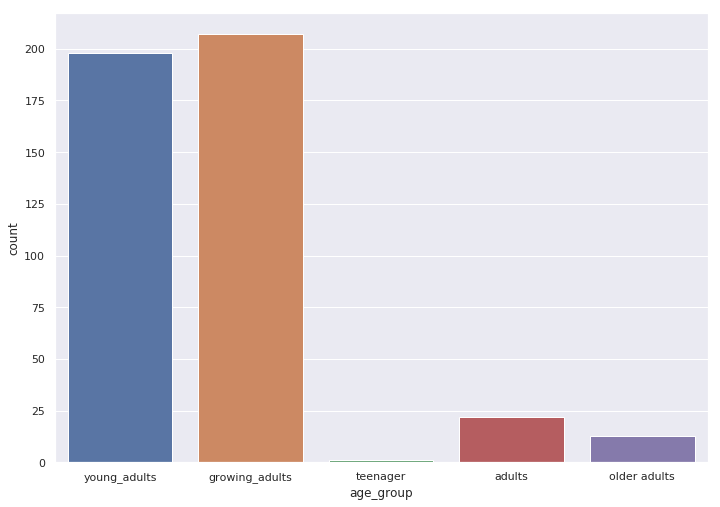

In [50]:
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data['age_group'])
#Most responses come from people between 18 and 34. 

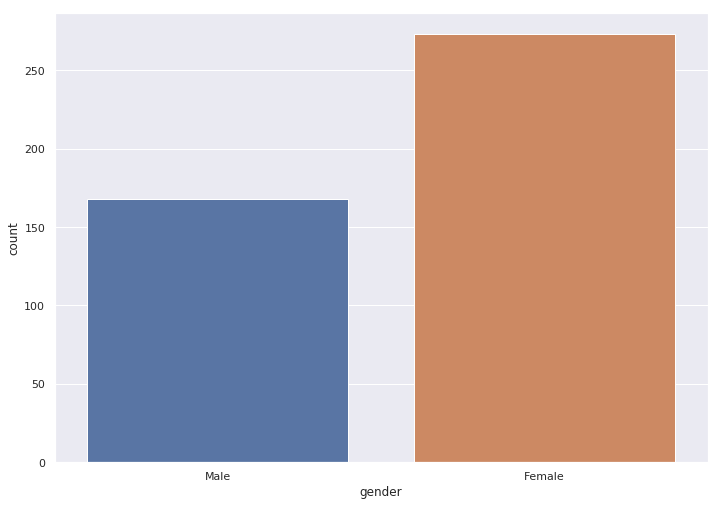

In [113]:
#gender
sns.countplot(data['gender'])
#more females on this survey

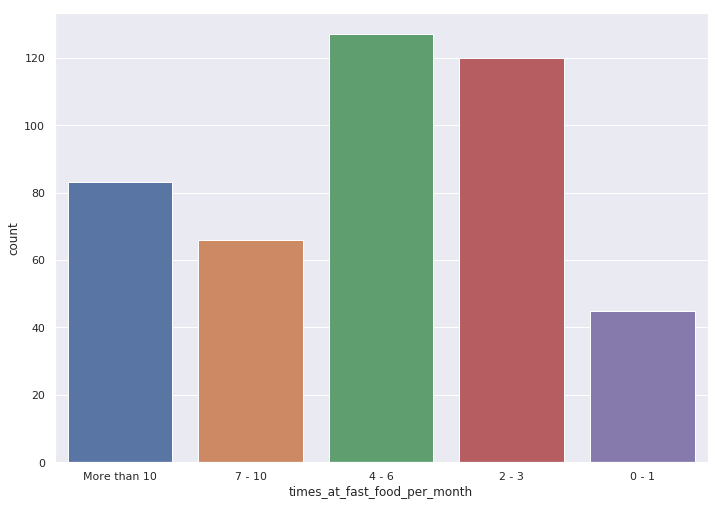

In [52]:
#no of times people visit the fast food
sns.countplot(data['times_at_fast_food_per_month'])

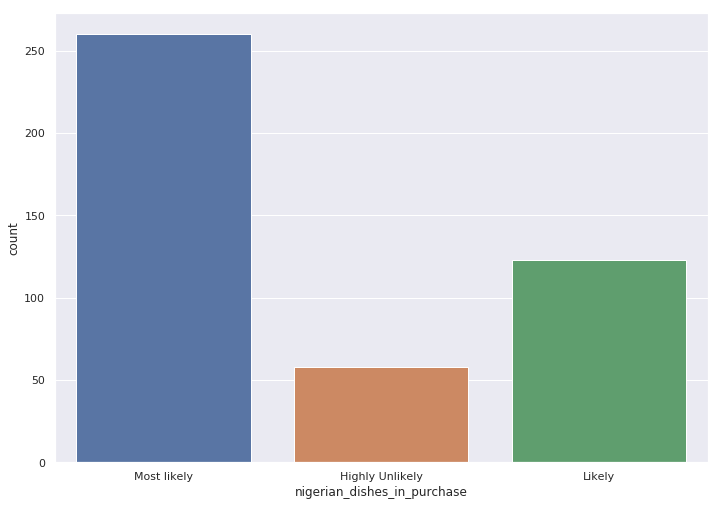

In [53]:
#how people like nigerian dishes in their purchases
sns.countplot(data['nigerian_dishes_in_purchase'])

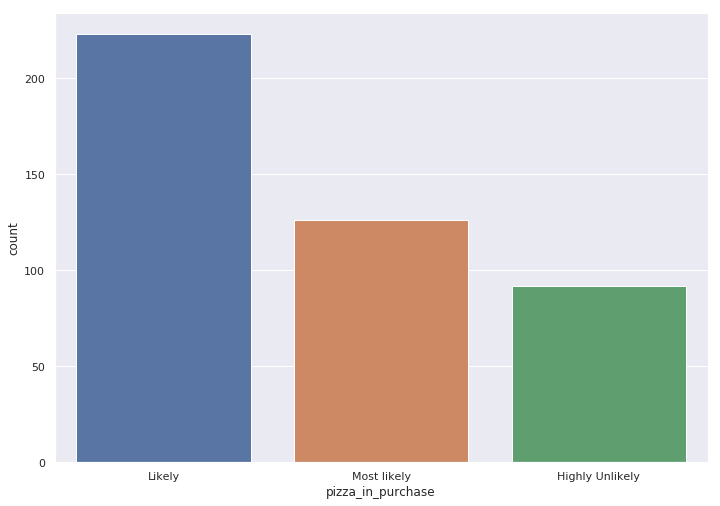

In [54]:
#how people like pizza in their purchases
sns.countplot(data['pizza_in_purchase'])

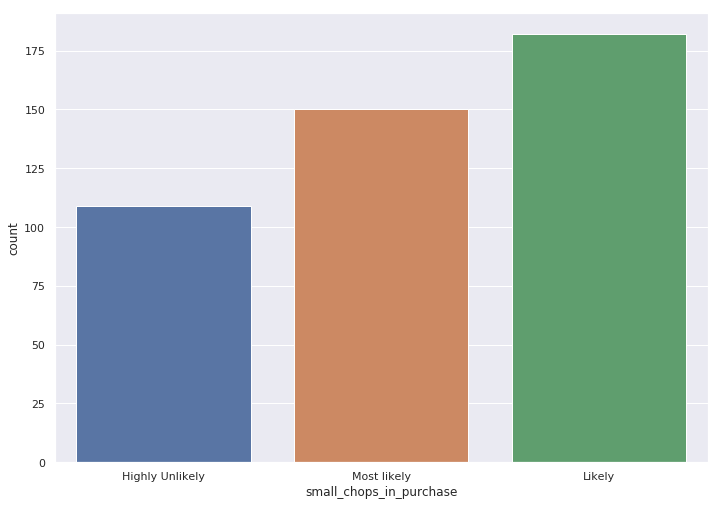

In [55]:
#how people like small chops in purchase
sns.countplot(data['small_chops_in_purchase'])

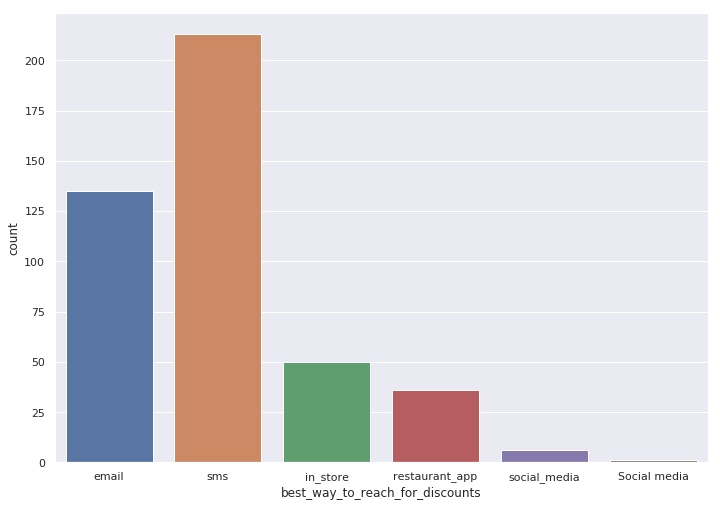

In [56]:
#best way to reach customers for discounts
sns.countplot(data['best_way_to_reach_for_discounts'])
#sms is the best way

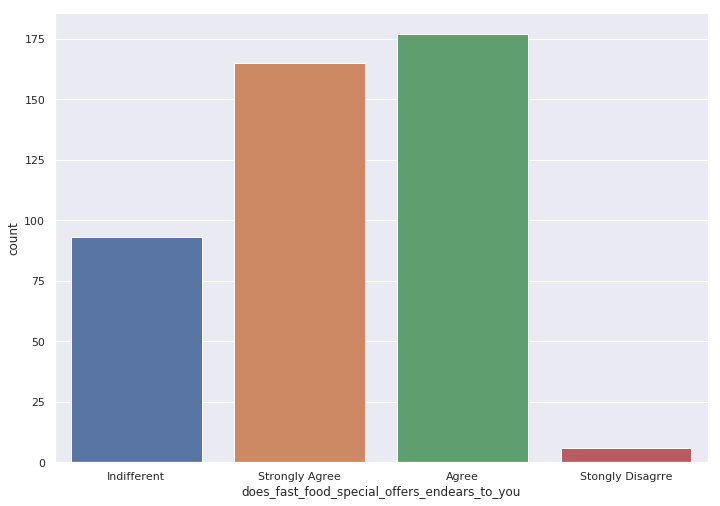

In [57]:
#does special offers endears to you
sns.countplot(data['does_fast_food_special_offers_endears_to_you'])

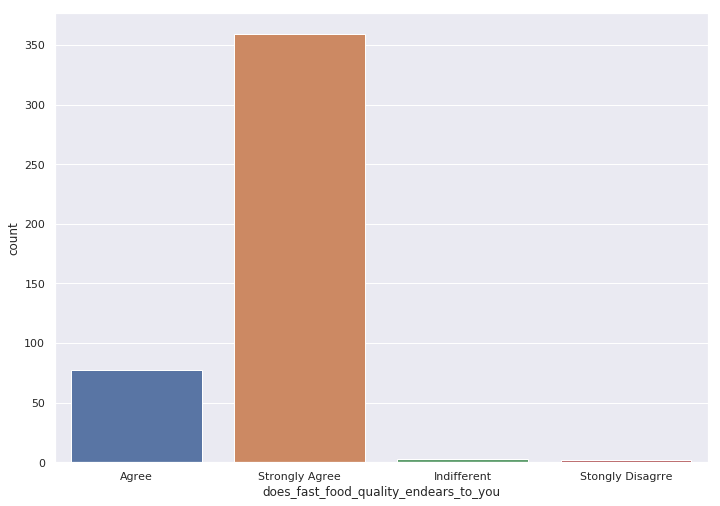

In [58]:
#are people particular about food quality
sns.countplot(data['does_fast_food_quality_endears_to_you'])
#quality is extremely important in choosing a fast food restaurant

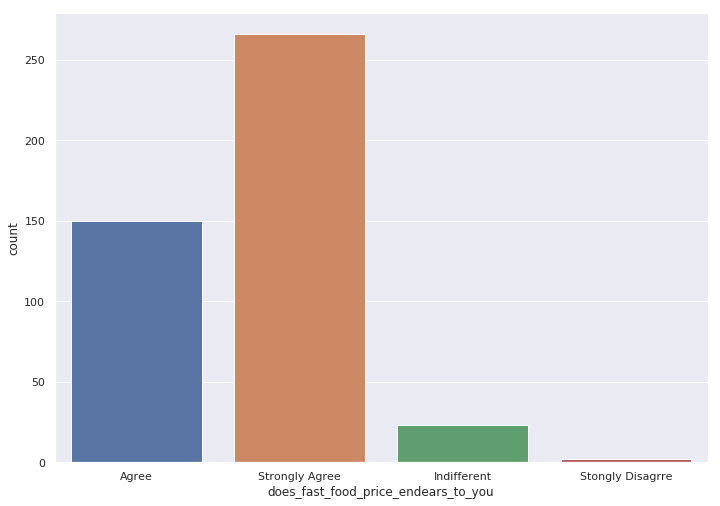

In [60]:
#are people particular about the food price
sns.countplot(data['does_fast_food_price_endears_to_you'])
#yes, the price is important

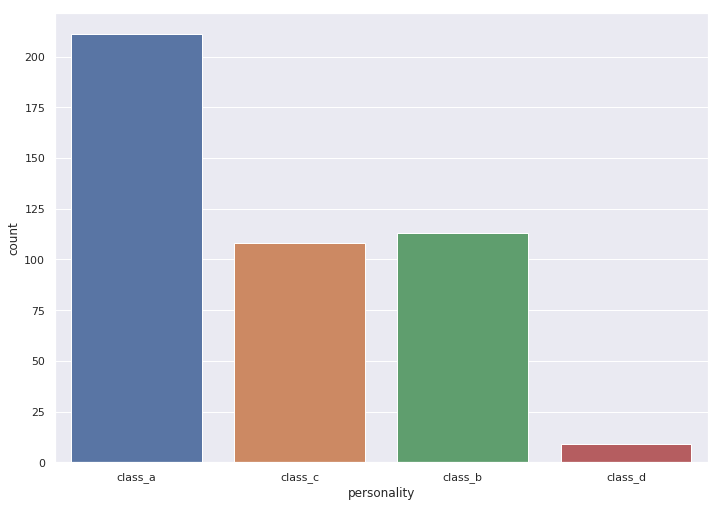

In [61]:
#personality of people on this survey
sns.countplot(data['personality'])

#most - I am original and a nonconformist

[Text(0,0,'shawarma_lover'),
 Text(0,0,'jollof_lover'),
 Text(0,0,'pizza_lover'),
 Text(0,0,'small_chops_lover'),
 Text(0,0,'burger_lover'),
 Text(0,0,'fried_rice_lover'),
 Text(0,0,'foodie'),
 Text(0,0,'jollof_shawarma_lover'),
 Text(0,0,'swallow_lover'),
 Text(0,0,'chicken_salad_lover'),
 Text(0,0,'ofada_rice_lover'),
 Text(0,0,'meat_lover'),
 Text(0,0,'meat_chicken_pie_lover'),
 Text(0,0,'jollof_small_chops_shawarma_lover'),
 Text(0,0,'beans_lover'),
 Text(0,0,'turkey_lover'),
 Text(0,0,'coffee_lover'),
 Text(0,0,'burger_small_chops_shawarma_lover'),
 Text(0,0,'chicken_lover'),
 Text(0,0,'pizza_small_chops_shawarma_lover')]

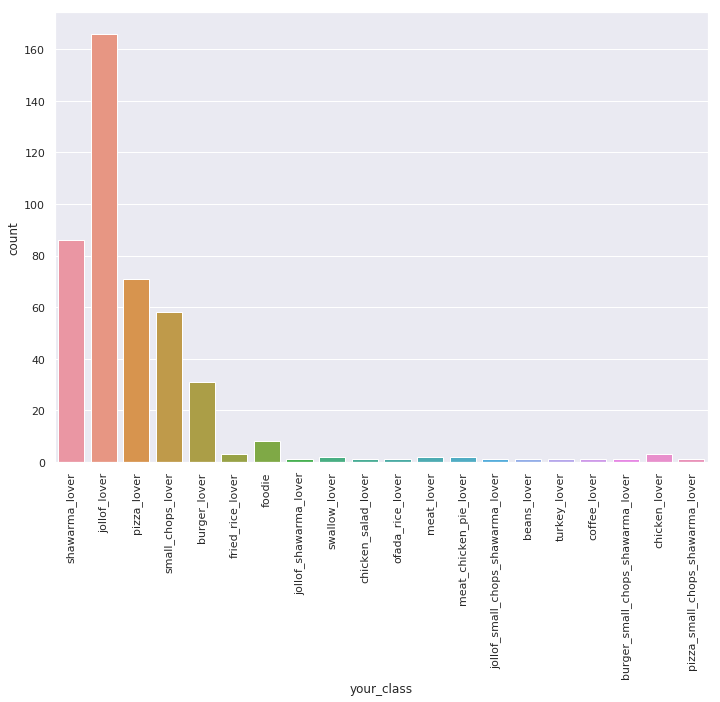

In [117]:
#class of people in the survey
chart = sns.countplot(data['your_class'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Bi-variate and Multi-variate analysis

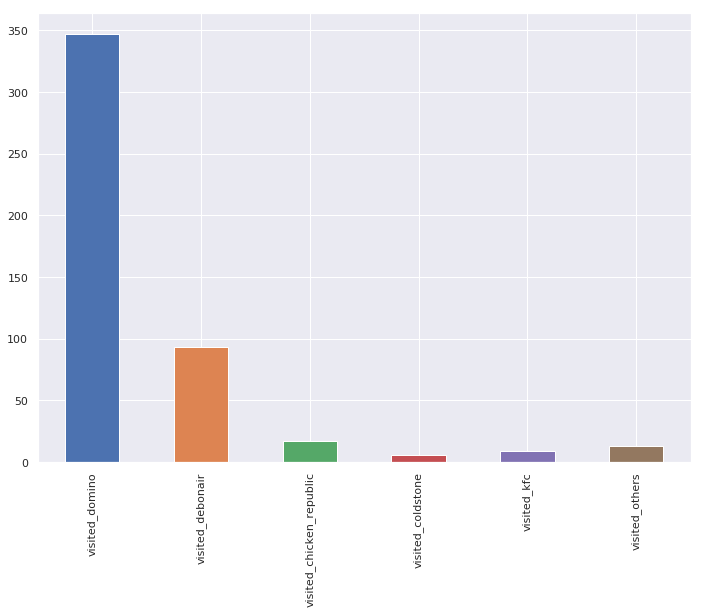

In [108]:
#most visited places
visited = data[['visited_domino', 'visited_debonair', 'visited_chicken_republic', 'visited_coldstone', 'visited_kfc', 'visited_others']]
visited.sum().plot(kind='bar')

#dominos seems to be top choice for the audience

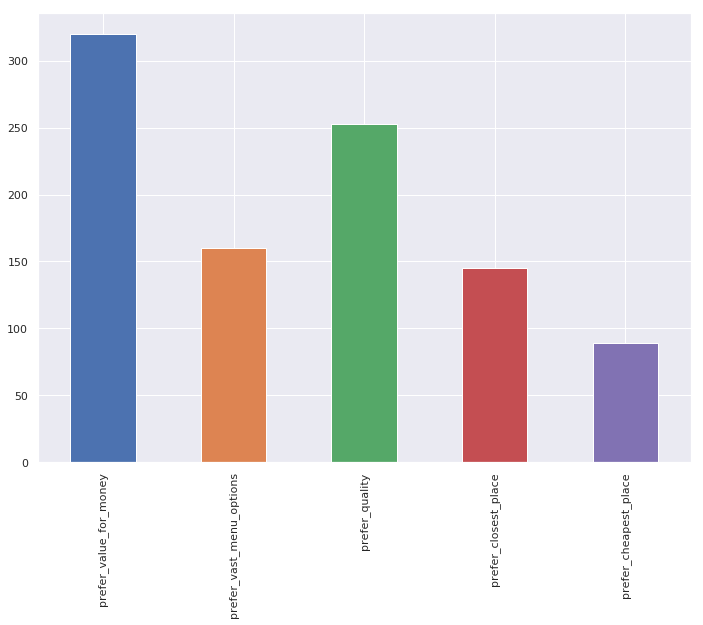

In [109]:
#preference in choosing a restaurant
preference = data[['prefer_value_for_money', 'prefer_vast_menu_options', 'prefer_quality', 'prefer_closest_place',
                  'prefer_cheapest_place']]
preference.sum().plot(kind='bar')

#'cheapest price' is not considered when trying to pick a restaurant. Value for money(quality) are important 
#considerations for choosing a restaurant

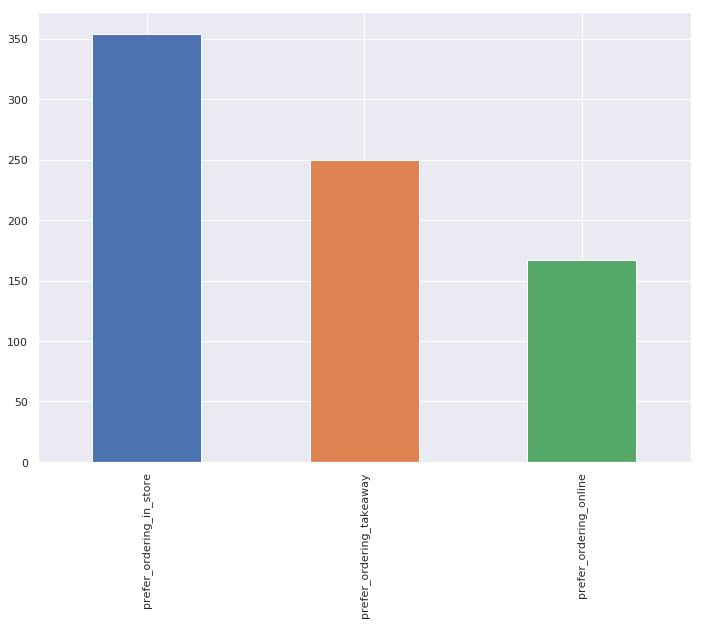

In [112]:
#preferred means of ordering
ordering = data[['prefer_ordering_in_store', 'prefer_ordering_takeaway', 'prefer_ordering_online']]
ordering.sum().plot(kind='bar')

#'online ordering' is the least attractive means of ordering. 
#People prefer buying in-store

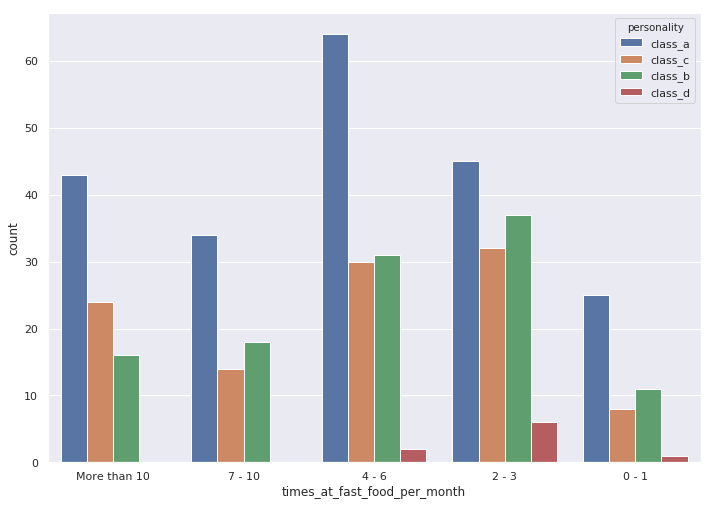

In [118]:
#how does personality affects the purchase power of respondents
sns.countplot(x='times_at_fast_food_per_month', hue='personality', data=data)

#people are authoritative tend to visit fast foods less often.
#shy people have it difficult visiting restaurants

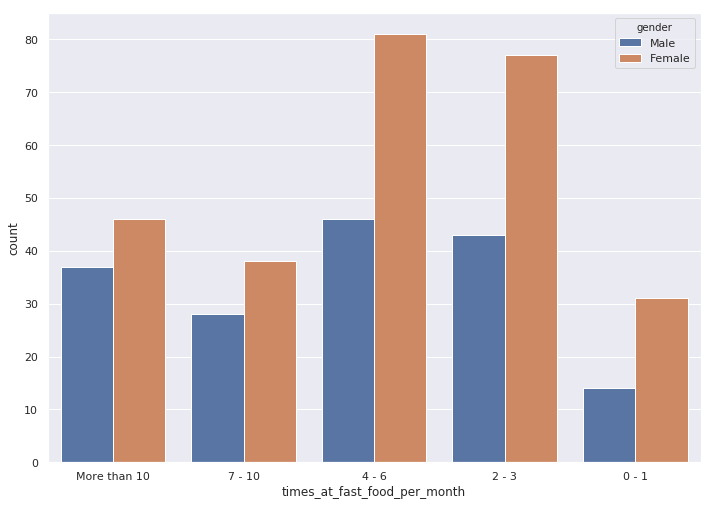

In [119]:
#how does gender affects purchase power of respondents
sns.countplot(x='times_at_fast_food_per_month', hue='gender', data=data)
#females visits fast foods more .... obviously

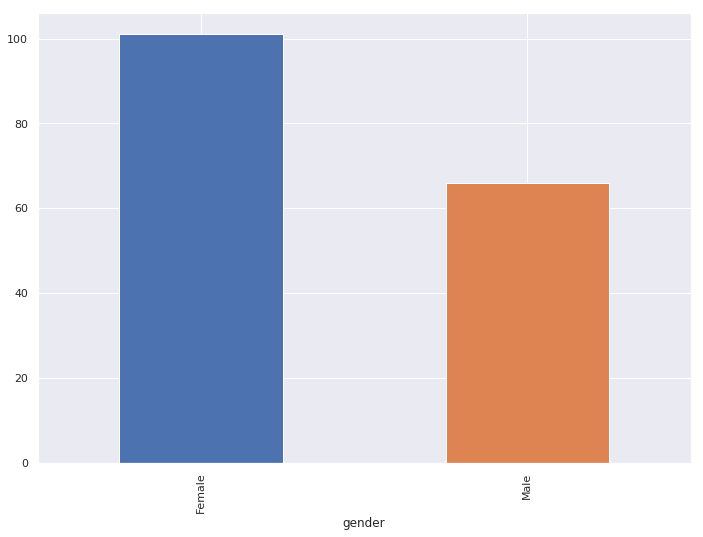

In [139]:
#what gender prefer ordering online. That will help when targeting ads for example, jumia foods. 
var = data.groupby('gender').prefer_ordering_online.sum()
var.plot(kind='bar')

#females prefer ordering online

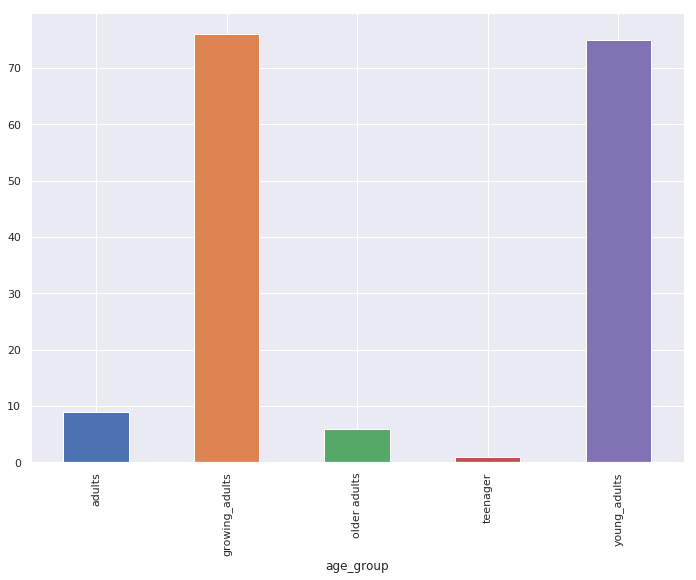

In [141]:
#age group that prefers ordering online
age_group = data.groupby('age_group').prefer_ordering_online.sum()
age_group.plot(kind='bar')

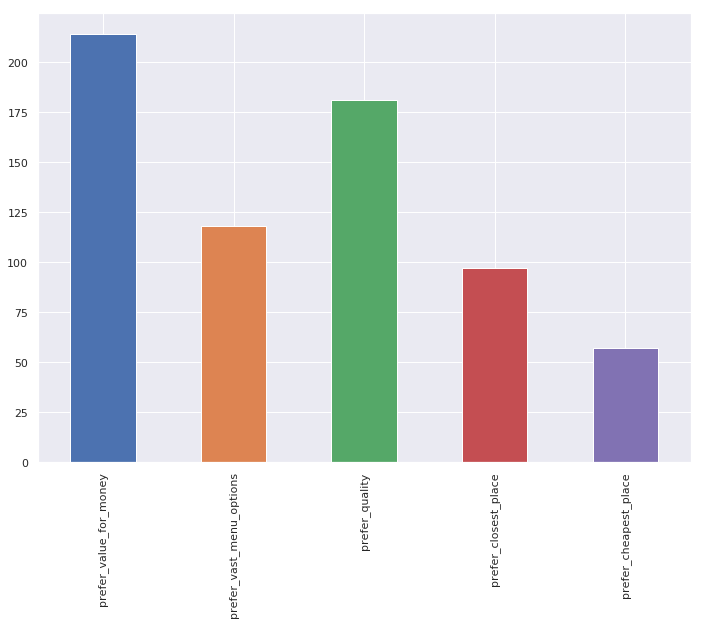

In [162]:
#why did people dominos more?
preference = data.loc[(data['visited_domino'] == 1) & ((data['pizza_in_purchase'] == 'Likely') | (data['pizza_in_purchase'] == 'Most likely'))][['prefer_value_for_money', 'prefer_vast_menu_options', 'prefer_quality',
       'prefer_closest_place', 'prefer_cheapest_place']]
preference.sum().plot(kind='bar')

#value for money

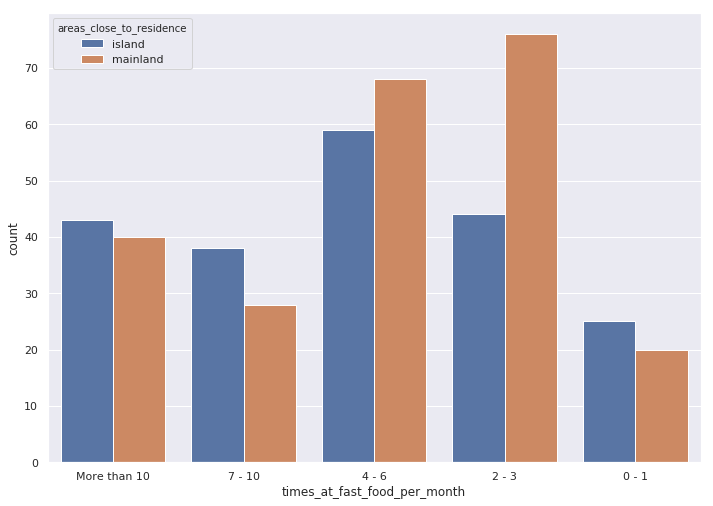

In [163]:
#does location affect purchase frequency
sns.countplot(x='times_at_fast_food_per_month', hue='areas_close_to_residence', data=data)